In [1]:
# Local installation for development
#!pip install -e .. 

In [1]:
# Import standard libraries
import os
import sys

# Third-Party Libraries
import numpy as np

# Import the Swarm Systems Lab Simulator
import ssl_simulator

from ssl_simulator import SimulationEngine
from ssl_simulator.data_manager import load_sim
from ssl_simulator.robot_models import SingleIntegrator, Unicycle2D
from ssl_simulator.controllers import ConstantSignal

# Import custom functions and classes
from visualization import PlotBasic

# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
SIMDATA_FILE1 = os.path.join(OUTPUT_DIR, "data1.csv")
SIMDATA_FILE2 = os.path.join(OUTPUT_DIR, "data2.csv")

In [9]:
dir(ssl_simulator)

['SimulationEngine',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'controllers',
 'createDir',
 'create_dir',
 'data_manager',
 'debug_eig',
 'get_idx',
 'gvf_trajectories',
 'load_data',
 'math',
 'network',
 'parse_kwargs',
 'robot_models',
 'scalar_fields',
 'visualization']

# Single integrator simulation

In [2]:
# ---- SI simulation example (run)

# Define the initial state
N = 5

p = np.array([np.random.random(N), np.random.random(N)]).T

x0 = [p]

# Controller settings
k = np.array([1,1])

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = SingleIntegrator(x0)
controller = ConstantSignal(k)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE1)

# --------------------------------
# Run the simulation and save data
tf = 1
simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 100/100 [00:00<00:00, 16022.25it/s]


time: shape (101,)
p: shape (101, 5, 2)
p_dot: shape (101, 5, 2)
u: shape (101, 1, 2)
k: shape (101, 1, 2)


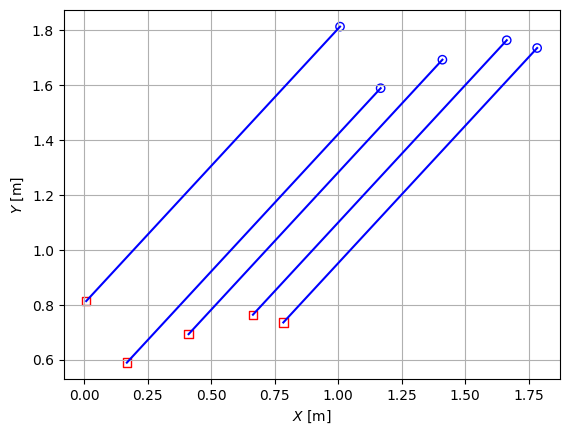

In [3]:
# ---- SI simulation plot

# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE1, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasic(simulation_data)

# Generate and display the plot
plotter.plot()

# 2D Unicycle simulation

In [4]:
# ---- 2D Uny simulation example (run)

# Define the initial state
N = 5

p = np.array([np.random.random(N), np.random.random(N)]).T
speed = np.ones(N)
theta = np.random.random(N) * np.pi


x0 = [p, speed, theta]

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = Unicycle2D(x0)
controller = ConstantSignal(np.pi/4)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE2)

# --------------------------------
# Run the simulation and save data
tf = 1
simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 100/100 [00:00<00:00, 12245.79it/s]


time: shape (101,)
p: shape (101, 5, 2)
speed: shape (101, 5)
theta: shape (101, 5)
p_dot: shape (101, 5, 2)
speed_dot: shape (101, 5)
theta_dot: shape (101, 5)
u: shape (101, 1)
k: shape (101, 1)


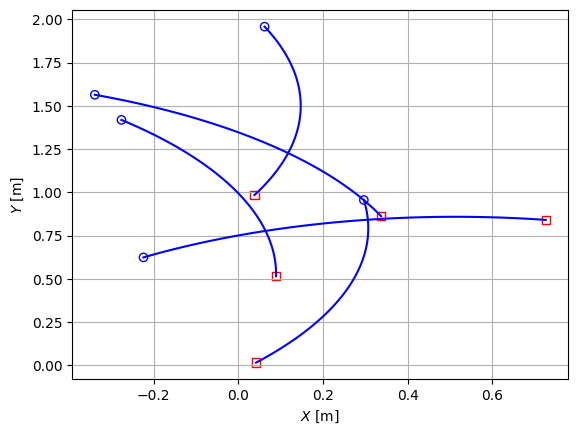

In [5]:
# ---- 2D Uny simulation plot

# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE2, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasic(simulation_data)

# Generate and display the plot
plotter.plot()